### Copyright (C) 2022 Sobhan Moradian Daghigh
#### Date: 2/17/2022

### Import Libraries

In [2]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from IPython.display import display
import import_ipynb
from EX04_Q1 import kmeans
import pandas as pd
import matplotlib.pyplot as plt

### Loading Datas

In [3]:
dataset = fetch_olivetti_faces()

In [4]:
data, targets = fetch_olivetti_faces(return_X_y=True)

In [5]:
data.shape

(400, 4096)

### Splitting the data into 20% of validation, 20% of test and 60% of train datasets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, stratify=targets, random_state=1000)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [22]:
display(x_train.shape, 
        x_test.shape, 
        x_val.shape)

(240, 4096)

(80, 4096)

(80, 4096)

In [23]:
def sse(x, labels, centroids):
    sse = 0
    for idx in range(len(centroids)):
        sse += np.sum((x[labels==idx] - centroids[idx]) ** 2)
    return sse

### Elbow

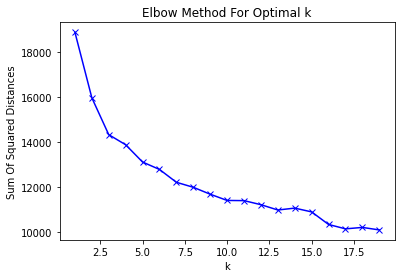

In [24]:
sum_of_squared_distances = []
n_clusters = range(1, 20)
km_models = []

for k in n_clusters:
    labels, centroids = kmeans(x_train, n_clusters=k, n_init=1000)
    km_models.append([labels, centroids])
    sum_of_squared_distances.append(sse(x_train, labels, centroids))

plt.plot(n_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum Of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### According to the above plot, I decided to set k = 13.

In [25]:
k = 13

In [26]:
labels, centroids = km_models[k - 1]

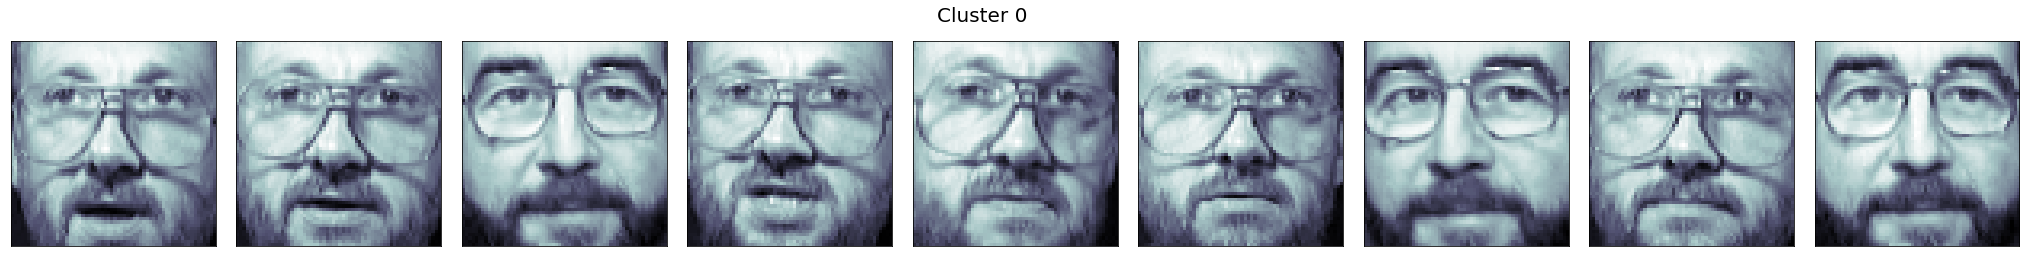

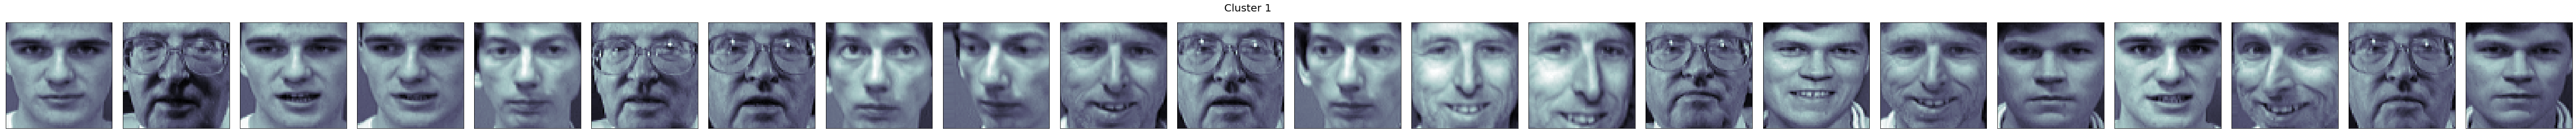

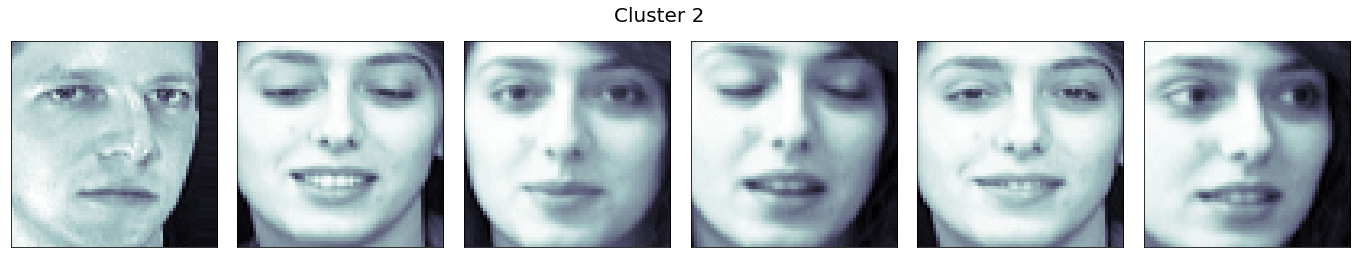

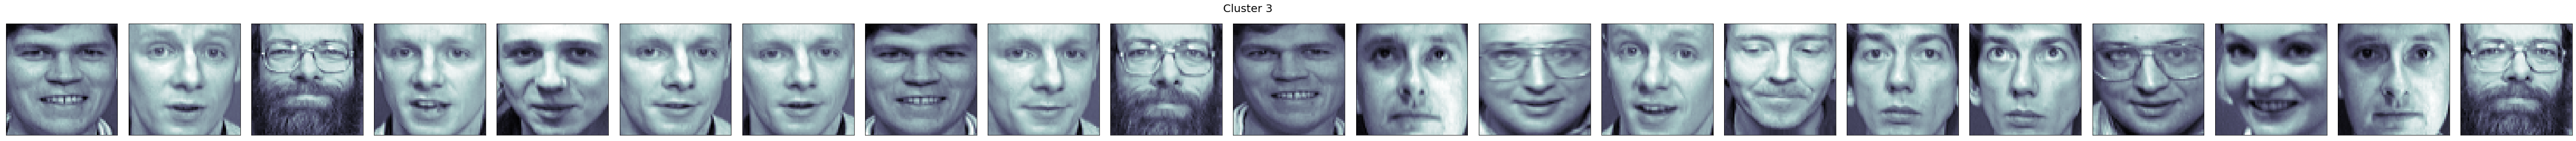

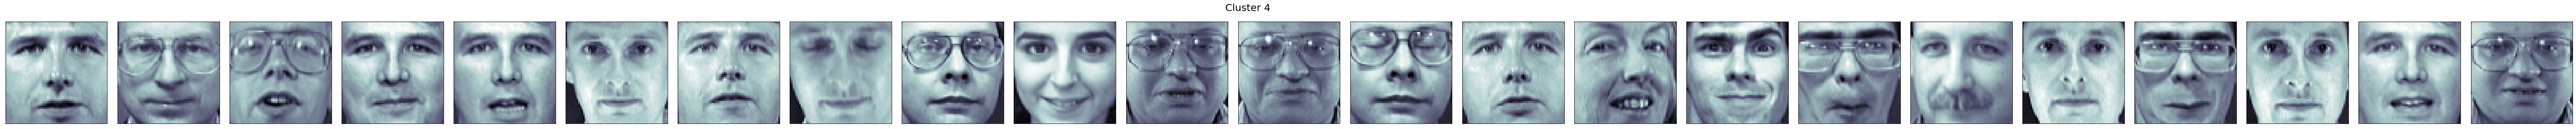

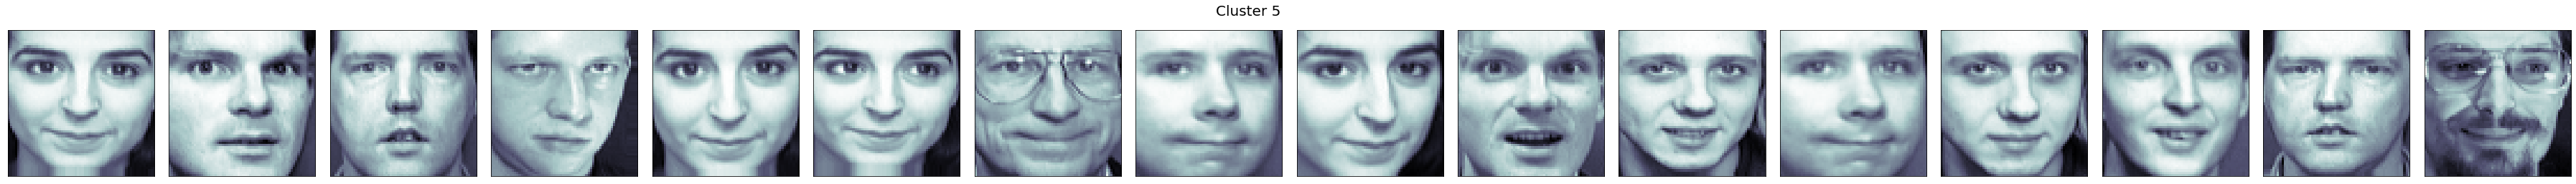

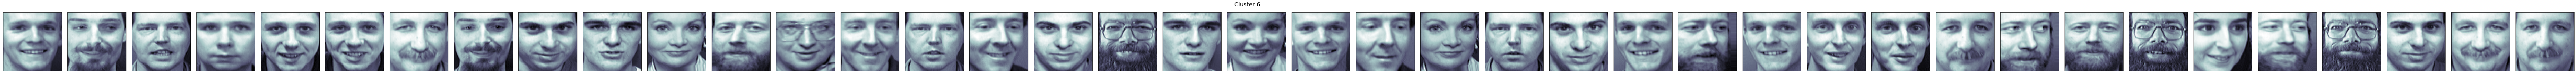

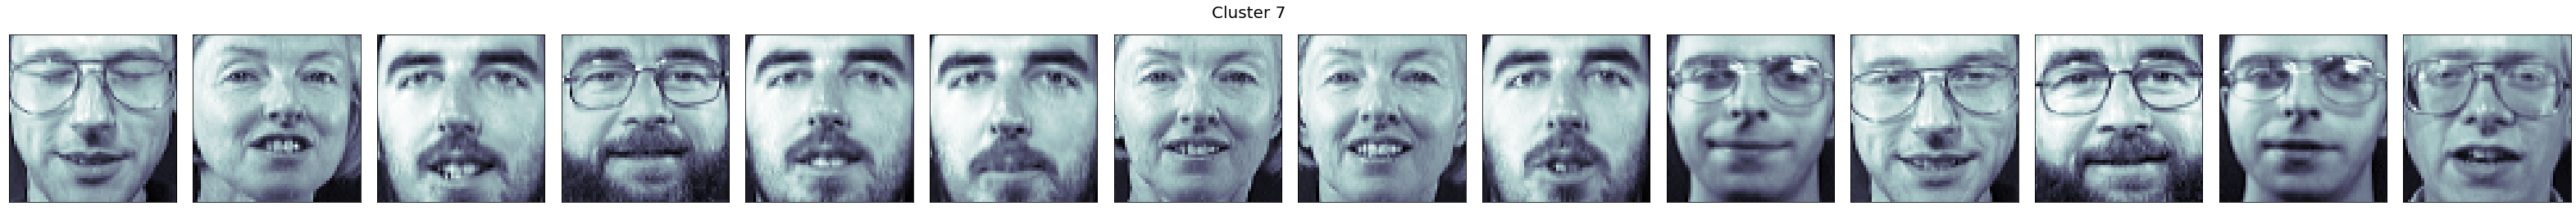

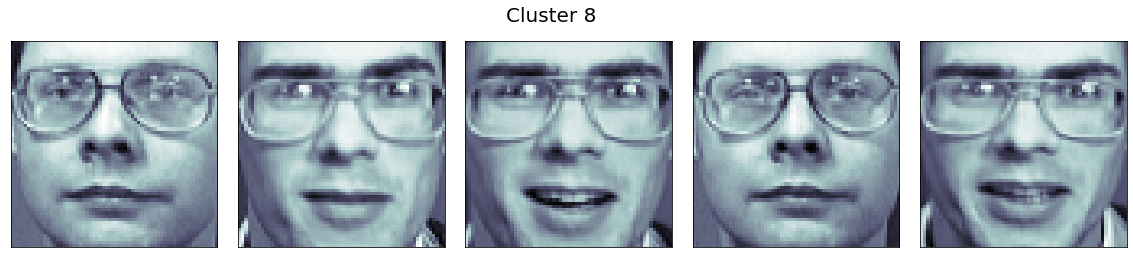

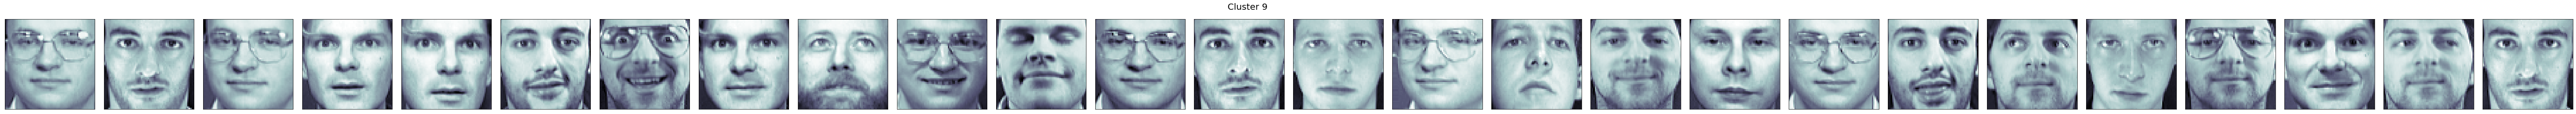

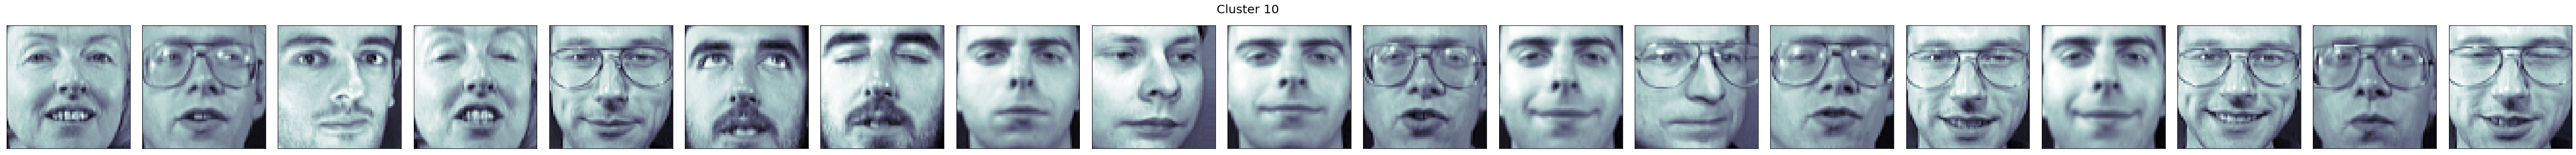

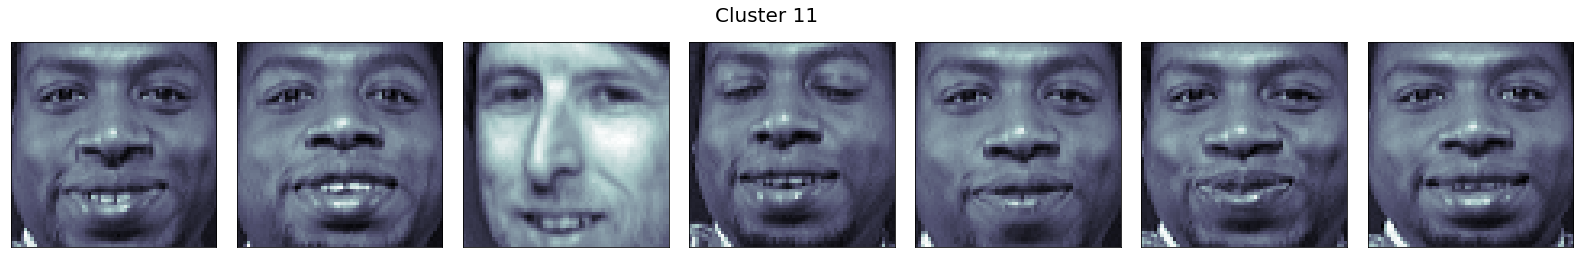

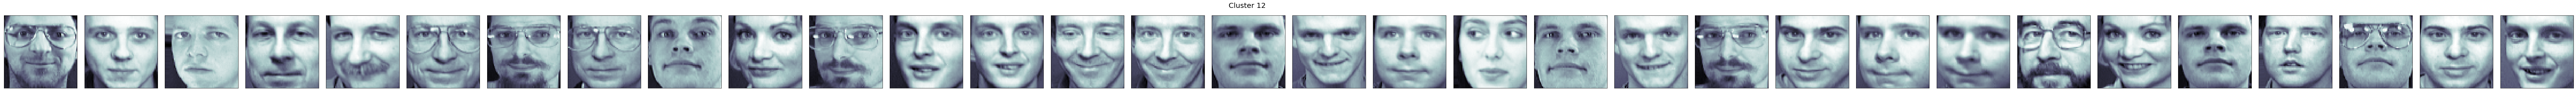

In [27]:
for i in range(k):
    index = np.nonzero(labels==i)[0]
    num = len(index)
    this_faces = x_train[index]
    fig, axes = plt.subplots(1, num, figsize=(4 * num, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(fig.axes):
        ax.imshow(this_faces[i].reshape(64, 64), cmap='bone')

### Finito.